Базовое ДЗ на 17.10.2024 Сердюков Алексей СГН3-11Б
=====

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Задание № 1
================================================================

Таблица c журналом посещений:
---

In [5]:
visits_info = pd.read_excel('hw_lesson02_sessions.xlsx', sheet_name='data')
visits_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167890 entries, 0 to 167889
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           167890 non-null  object        
 1   region            167890 non-null  object        
 2   device            167890 non-null  object        
 3   channel           167890 non-null  object        
 4   session_duration  167890 non-null  float64       
 5   session_start     167890 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 7.7+ MB


In [6]:
visits_info['region'].value_counts()

region
CN               33116
North America    28260
CIS              26187
Europe           23413
South America    19962
Africa           15049
SEA              12356
Australia         9547
Name: count, dtype: int64

In [7]:
visits_info['device'].value_counts()

device
Andoroid    116186
iPhone       51704
Name: count, dtype: int64

In [8]:
visits_info['session_start'].min()


Timestamp('2020-04-01 00:00:23')

In [9]:
visits_info['session_start'].max()

Timestamp('2020-06-30 23:59:45')

Таблица о туториалах:
---

In [11]:
tutorial_done = pd.read_csv('hw_lesson02_tutorial_completed.csv')
tutorial_done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59857 entries, 0 to 59856
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       59857 non-null  object
 1   event_name    59857 non-null  object
 2   event_dt      59857 non-null  object
 3   duration_sec  59857 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [12]:
tutorial_done['event_dt'].min()

'2020-04-01 00:04:01'

In [13]:
tutorial_done['event_dt'].max()

'2020-06-30 23:54:40'

Из данных можно понять, что нибольшее количество количество пользователей пришло из Китая. Основная ОС- Android. Данные о аналитике собирались на протяжении 3 месяцев.

Задание № 2
================================================================

Таблица о туториалах:
---

Среднее арифметическое, cреднеквадратическое отклонение, медиана:

In [18]:
(tutorial_done['duration_sec'].mean(), tutorial_done['duration_sec'].std(),tutorial_done['duration_sec'].median() )

(2696.541356900613, 1631.8267232939195, 2398.0)

В минутах:

In [20]:
((tutorial_done['duration_sec'].mean())/60, (tutorial_done['duration_sec'].median())/60)

(44.942355948343554, 39.96666666666667)

Гистограмма:

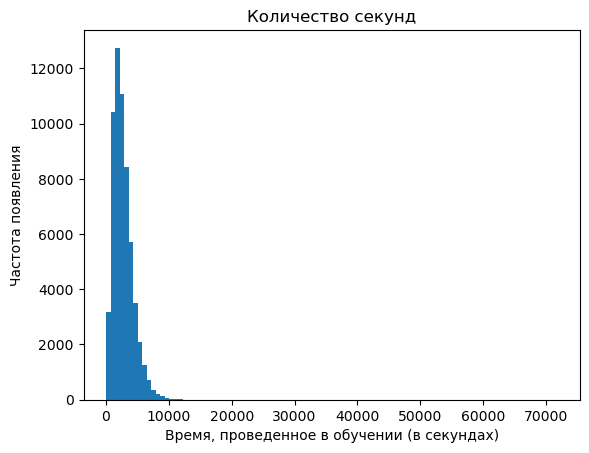

In [22]:
plt.hist(tutorial_done['duration_sec'], bins=100)
plt.xlabel('Время, проведенное в обучении (в секундах)')
plt.ylabel('Частота появления')
plt.title('Количество секунд')
plt.grid(False)
plt.savefig('pict')
plt.show()

Из полученных данных можно сделать вывод, что большинство людей проводят в обучении в средем от 30 до 50 минут.

Таблица c журналом посещений:
---

Среднее арифметическое, cреднеквадратическое отклонение, медиана:

In [26]:
(visits_info['session_duration'].mean(), visits_info['session_duration'].std(),visits_info['session_duration'].median() )

(1807.922733189622, 1807.8459582958205, 1250.3175364674275)

В минутах:

In [28]:
((visits_info['session_duration'].mean())/60, (visits_info['session_duration'].median())/60)

(30.132045553160367, 20.83862560779046)

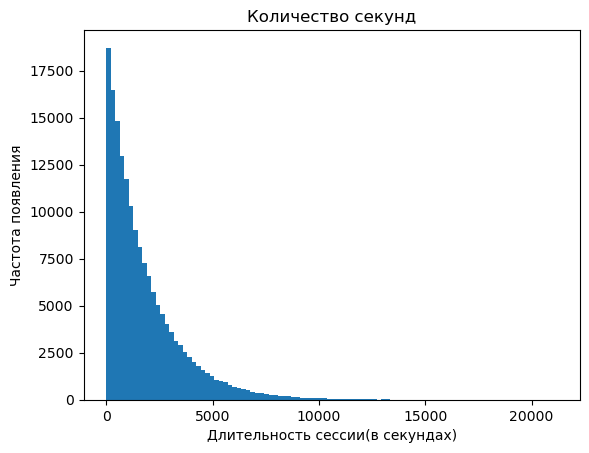

In [29]:
plt.hist(visits_info['session_duration'], bins=100)
plt.xlabel('Длительность сессии(в секундах)')
plt.ylabel('Частота появления')
plt.title('Количество секунд')
plt.grid(False)
plt.savefig('pict')
plt.show()

Общий вывод : Из полученных данных делаем вывод, что большая половина пользователей находятся в приложении не больше 30-40 минут.
=================================================================================================================================

Задание № 3
================================================================

Таблица о туториалах:
---

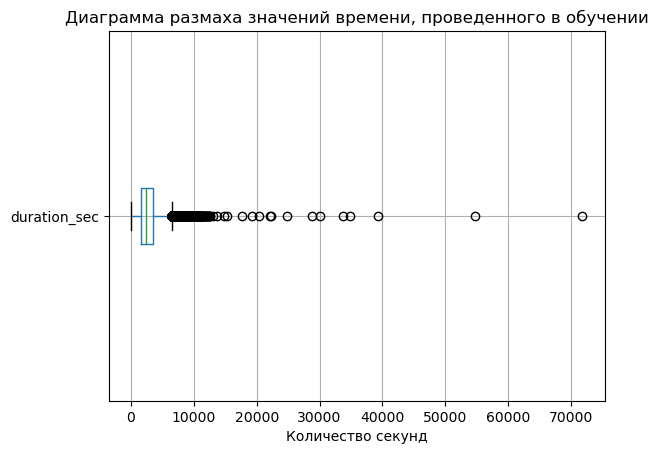

In [33]:
tutorial_done.boxplot('duration_sec', vert=False)
plt.xlabel('Количество секунд')
plt.title('Диаграмма размаха значений времени, проведенного в обучении')
plt.show()

99% перцентиль

In [35]:
tutorial_done['duration_sec'].quantile(0.99)

7605.440000000002

Таблица c журналом посещений:
---

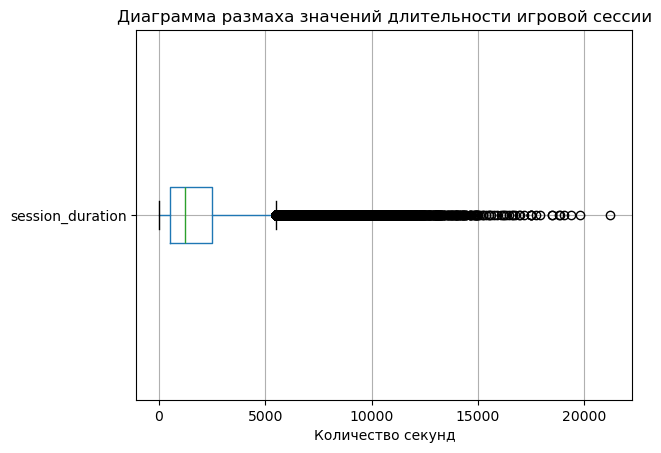

In [37]:
visits_info.boxplot('session_duration', vert=False)
plt.xlabel('Количество секунд')
plt.title('Диаграмма размаха значений длительности игровой сессии')
plt.show()

99% перцентиль

In [39]:
visits_info['session_duration'].quantile(0.99)

8323.137208860211

Задание № 4
================================================================

Таблица о туториалах:
---

In [42]:
Q1 = tutorial_done['duration_sec'].quantile(0.25)
Q3 = tutorial_done['duration_sec'].quantile(0.75)
upper_bound = Q3 + 1.5 * (Q3-Q1)
upper_bound

6480.5

In [43]:
tutorial_done_filtered = tutorial_done.query('duration_sec <= 6480.5')
tutorial_done_filtered.max()

user_id                fffcc8249f_4
event_name       tutorial_completed
event_dt        2020-06-30 23:54:40
duration_sec                   6480
dtype: object

In [44]:
tutorial_done_filtered.to_csv('tutorial_done_filtered.csv', index=False)

Таблица c журналом посещений:
---

In [46]:
Q1 = visits_info['session_duration'].quantile(0.25)
Q3 = visits_info['session_duration'].quantile(0.75)
upper_bound = Q3 + 1.5 * (Q3-Q1)
upper_bound

5490.393881196964

In [47]:
visits_info_filtered = visits_info.query('session_duration <= 5490.393881196964')
visits_info_filtered.max()

user_id                    fffcc8249f_4
region                    South America
device                           iPhone
channel                        SenseAds
session_duration            5490.224398
session_start       2020-06-30 23:59:45
dtype: object

In [48]:
visits_info_filtered.to_csv('visits_info_filtered.csv', index=False)

Задание № 5
================================================================

In [50]:
def filter_outliers(df,column,percentile):
    upper_bound = df[column].quantile(percentile)
    df_filtered = df.query(f'{column} <= @upper_bound')
    return df_filtered


Проверка функции:
---

In [52]:
visits_info_on_04 = filter_outliers(visits_info,'session_duration',0.4)
visits_info_on_04.max()

user_id                    fffa9419ccf6
region                    South America
device                           iPhone
channel                        SenseAds
session_duration             921.303583
session_start       2020-06-30 23:59:45
dtype: object